## Find LCCA Peak - ASI, NT2, ERA5, OSISAF408, MERRA2

- scipy.signal.find_peaks
- input: LCCA index
- output: peak data, peak value

In [1]:
import datetime as dt
import numpy as np
from netCDF4 import Dataset
from scipy.signal import find_peaks
import pickle

In [2]:
def ReadLCCA(filename):
    '''
    Read data and LCCA value form txt files
    '''
    file = open(filename,'r')
    date = []       # peak date
    val = []        # peak value
    try:
        for line in file.readlines():
    #            print(line)
            if line[0]!='\n':
                date.append(dt.datetime.strptime(line.split()[0],"%Y%m%d"))                
                val.append(float(line.split()[1]))
    finally:
        file.close()
    
    return date,val

In [13]:
def switch_path(type):
    pub_path = "C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA\\"
    
    switcher = {
        ASI: pub_path+"ASI_2002_2019\\",
        NT2: pub_path+"NT2_2002_2019\\",
        ERA5: pub_path+'ERA5_2002_2019\\',
        OSI401: pub_path+'OSI-401\\',
        OSI408: pub_path+'OSI-408\\',
        MERRA2: pub_path+'MERRA2_2002_2019\\'
    }
    
    return switcher.get(type, "nothing") 

In [5]:
ASI = 'ASI-SIC-LCCA-'
NT2 = 'NT2-SIC-LCCA-'
ERA5 = 'ERA5-SIC-LCCA-'
OSI401 = 'OSI-SSMI-SIC-LCCA-'
OSI408 = 'OSI-AMSR2-SIC-LCCA-'
MERRA2 = 'MERRA2-SIC-LCCA-'

### 1. ASI SIC LCCA PEAKS

In [ ]:
if __name__ == "__main__":

    SavePath = 'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA\\' 
    
    year = ['2019']
    
    for i in year:
        
        filename = switch_path(ASI) + ASI + i + '-KD.txt'
#         fname1 = switch_path(NT2) + NT2 + year + '-KD.txt'
#         fname2 = switch_path(ERA5) + ERA5 + year + '-KD.txt'
#         fname3 = switch_path(OSI401) + OSI401 + year + '-KD.txt'
#         fname4 = switch_path(OSI408) + OSI408 + year + '-KD.txt'
    
        # Read LCCA data
        Dates,LCCA = ReadLCCA(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info to *.txt  
        f = open(SavePath+str(i)+'_LCCA_Peak_ASI.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
            print('%10s %f'%(Dates[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()

        
        
        
        ''' Plot LCCA with peaks '''
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
#        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
#        plt.plot(Dates,LCCA,'magenta',label='NT2')
        plt.plot(Dates,LCCA,'blue',label='ASI')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")     
                
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

#         plt.show()
#        plt.savefig(SavePath+str(i)+'_LCCA_Peak_ERA5.jpg')
        plt.savefig(SavePath+str(i)+'_LCCA_Peak_ASI.jpg')
    
    print("finished")
        

### 2. OSISAF 408 SIC LCCA PEAKS

In [22]:
if __name__ == "__main__":

    SavePath = 'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA\\' 
    
    year = ['2016','2017','2018','2019']
    
    for i in year:
        
        filename = switch_path(OSI408) + OSI408 + i + '-KD.txt'
    
        # Read LCCA data
        Dates,LCCA = ReadLCCA(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info to *.txt  
        f = open(SavePath+str(i)+'_LCCA_Peak_OSI408.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
            print('%10s %f'%(Dates[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()      
        
        ''' Plot LCCA with peaks '''
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
#        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
#        plt.plot(Dates,LCCA,'magenta',label='NT2')
        plt.plot(Dates,LCCA,'black',label='OSI-408')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")     
                
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

#         plt.show()
        plt.savefig(SavePath+str(i)+'_LCCA_Peak_OSI408.jpg')
        plt.close()
    
    print("finished")
        



2017-07-08 13.260000
2017-07-21 33.190000
2017-07-31 8.110000
2017-08-07 18.810000
2017-08-17 34.350000
2017-08-28 26.520000
2017-09-04 10.230000
2017-10-28 5.830000


2018-07-01 9.840000
2018-07-10 17.670000
2018-08-17 7.680000
2018-08-30 21.700000
2018-09-09 12.270000


2019-06-28 14.320000
2019-07-14 7.000000
2019-08-14 12.790000
2019-08-23 32.060000
2019-08-30 9.340000


finished


### 3. NT2 SIC LCCA PEAKS

2019-08-23 9.880000
2019-08-30 5.940000


finished


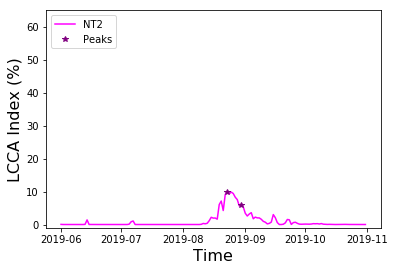

In [13]:
if __name__ == "__main__":

    SavePath = 'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA\\' 
    
    year = ['2019']
    
    for i in year:
        
        filename = switch_path(NT2) + NT2 + i + '-KD.txt'
    
        # Read LCCA data
        Dates,LCCA = ReadLCCA(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info to *.txt  
        f = open(SavePath+str(i)+'_LCCA_Peak_NT2.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
            print('%10s %f'%(Dates[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()      
        
        ''' Plot LCCA with peaks '''
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
#        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
        plt.plot(Dates,LCCA,'magenta',label='NT2')
#         plt.plot(Dates,LCCA,'black',label='OSI-408')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")     
                
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

#         plt.show()
        plt.savefig(SavePath+str(i)+'_LCCA_Peak_NT2.jpg')
#         plt.close()
    
    print("finished")
        

### 4. MERRA2 SIC LCCA

In [17]:
if __name__ == "__main__":

    SavePath = 'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA-Peaks\\' 
    
#     year = ['2002','2003','2004','2005','2006','2007','2008','2009','2010']
#     year = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
    year = ['2016']
    
    for i in year:
        
        filename = switch_path(MERRA2) + MERRA2 + i + '-KD.txt'
    
        # Read LCCA data
        Dates,LCCA = ReadLCCA(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info to *.txt  
        f = open(SavePath+str(i)+'_LCCA_Peak_MERRA2.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
            print('%10s %f'%(Dates[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()      
        
        ''' Plot LCCA with peaks '''
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
#        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
#         plt.plot(Dates,LCCA,'magenta',label='NT2')
        plt.plot(Dates,LCCA,'cyan',label='MERRA2')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")     
                
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

#         plt.show()
        plt.savefig(SavePath+str(i)+'_LCCA_Peak_MERRA2.jpg')
        plt.close()
    
    print("finished")
        

2016-07-16 13.030000
2016-07-28 17.050000
2016-08-25 60.070000
2016-09-03 60.510000
2016-09-19 18.070000
2016-10-17 50.420000


finished


### 5. ERA SIC LCCA

2019-06-27 7.630000
2019-07-14 5.120000
2019-08-14 19.370000
2019-08-25 33.200000
2019-09-03 22.750000


finished


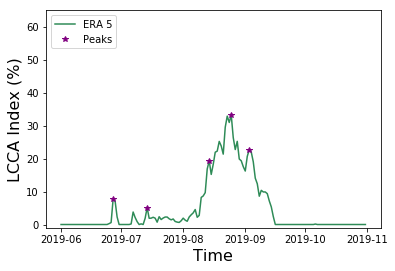

In [16]:
if __name__ == "__main__":

    SavePath = 'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA-Peaks\\' 
    
    year = ['2019']
    
    for i in year:
        
        filename = switch_path(ERA5) + ERA5 + i + '-KD.txt'
    
        # Read LCCA data
        Dates,LCCA = ReadLCCA(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info to *.txt  
        f = open(SavePath+str(i)+'_LCCA_Peak_ERA5.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
            print('%10s %f'%(Dates[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()      
        
        ''' Plot LCCA with peaks '''
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
#         plt.plot(Dates,LCCA,'magenta',label='NT2')
#         plt.plot(Dates,LCCA,'black',label='OSI-408')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")     
                
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

#         plt.show()
        plt.savefig(SavePath+str(i)+'_LCCA_Peak_ERA5.jpg')
#         plt.close()
    
    print("finished")
        